<a href="https://colab.research.google.com/github/Johnson2209/Artificial-Intellignce/blob/main/Machine_Learning_Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Deep Neural Network - Image Classification 

### Project Overview:
* The Dataset for this project is the popular CIFAR-10 dataset.
It contains several images which fall under 10 broad classifications: Airplanes, Cars, Birds, Cats, Deer, Dogs, Frogs, Horses, Ships, Trucks.

* There are 6000 images for each class

* CIFAR stands for Canadian Institute for Advanced Research

* CIFAR is widely used for Machine Learning and Computer Vision
You're working as a car salesman and you would like to build a model that will predict the total dollar amount that customers are willing to pay given the following attributes.

* Images have low resolution (32 $\times$ 32 pixels)

* Data Source :[link text](https://www.cs.toronto.edu/~kriz/cifar.html)

### Objective: 
 To train our Classifier Model (DNN) to classify any given image into one of the 10 target image classes listed above
 
To achieve this objective, we will use 50000 dataset for training and 10000 dataset for testing

### How to Digitally represent an image:

* A greyscale image is a sytem of 256 tones with values ranging from 0 to 255
* 0 represents black, 255 represents white; values between 0 and 255 represents grey between black and white
* In the 8-bits binary sytem, 00000000 represents black, and 11111111 represents white
* 11111111 in binary is equivalent to 255 in decimal


# Prepocessing

### Feature Extraction: Feature Detectors (Convolution Layer)
* Convolution uses a kernel matrix to scan a given image and apply a filter to obtain a certain effect
* An image kernel is a matrix used to apply effects such as blurring or sharpening
* Kernels are used in Machine Learning for Feature Extraction to select the most important features of an image: Feature Detector $\times$ image = feature map
* Convolution preserves the spatial relationship between pixels

### RELU (Rectified Linear Units) Layer
* RELU layers are used to add non-linearity in the feature map
* It also enhances the sparsity or scattered the feature map is : Negative values in the feature map becomes zero, positive values are kept constant
* The gradient of the RELU does not varnish as we increase $x$ compared to the sigmoid function
* 

### Pooling (Downsampling) Layer
* Pooling layers are placed after convolution layers to reduce feature map dimensionality
* This improves the computational efficieny while preserving the features
* Pooling helps the model to generalize by avoiding overfitting
* Max pooling works by retaining the maximum feature response within a given sample size in a feature map 

### Flattening
* converting the downsized feature map into 1-D for feeding into the input layer

# Increase Fliter/Dropout
* Improve accuracy by adding more feature detectors/filters or adding a dropout
* Drop out refers to dropping out a unit in a neural network
* Neurons develop co-dependency amongs each other during training
* Dropout is a regularization technique for reducing overfitting in neural networks
* It enables training to happen on different architectures of the neural network


# Confusion Matrix
A confusion matrix is used to describe the performance of a classification model

* True Positive (TP) : Cases when classifier predicted TRUE (e.g that a patient has a disease) and the correct class was TRUE (the patient actually has the disease)
* True Negative (TN) : Cases when model predicted FALSE (no disease), and correct class was FALSE ( patient did not have the disease)
* False Positive (FP) (Type I error): Classifier predicted TRUE, but the correct class  was FALSE (patient did not have disease)
* False Negative (FN) (Type II error): Cases where classifier predicted FALSE, but the correct class was TRUE.

# Key Performance Indicator(KPI)
* Classification accuracy = (TP + TN)/(TP +TN +FP + FN)
* Misclassification (error) rate = (FP + FN)/(TP +TN +FP + FN)
* Precision = TP/Total True Predicitions = TP/(TP + FP) , that is, when model predicted TRUE class, how often was it right?
* Recall = TP/Actual True Predicitions = TP/(TP + FN) , that is, when the class was actually TRUE, how often did the classifier/model get it right? 


In [1]:
# import libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

[1]


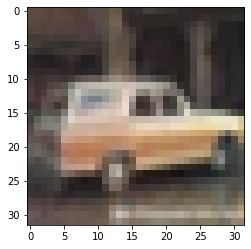

In [4]:
# Visualise data
# visualise image at position i
i =1006
plt.imshow(X_train[i])
print(y_train[i]) # print the associated class label

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


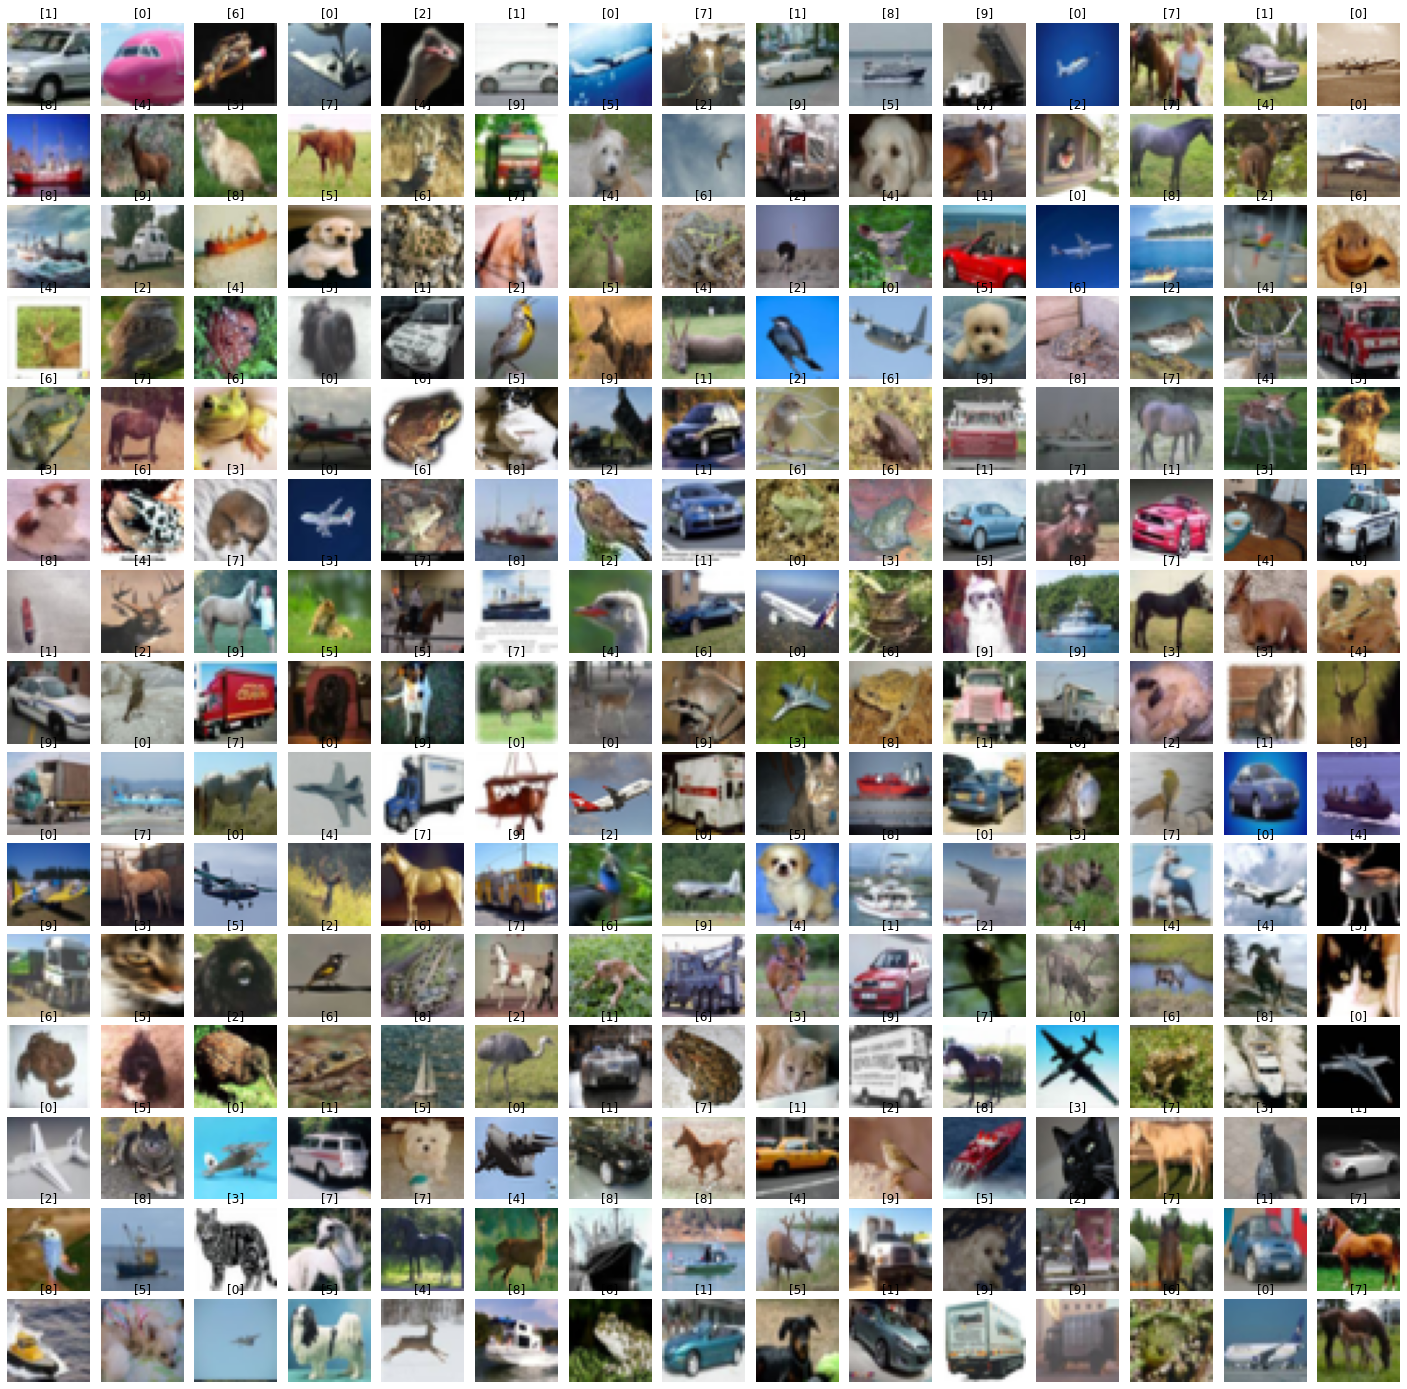

In [5]:
# we'll print a matrix of images in a grid of size W_grid*L_grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid ,figsize = (25,25))
axes = axes.ravel() #this helps flatten the matrix into W_grid*L_grid array
n_training = len(X_train) #we are interested in plotting random images from (5000 datasets) to fill our W_grid*L_grid grid

for i in np.arange(0, W_grid*L_grid):
  index = np.random.randint(0, n_training) # pick a random number between 0 and n_trianing
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace= 0.1, wspace =0.1) 

In [6]:
n_training

50000

In [7]:
# Data Preparation
X_train = X_train.astype('float32')#Convert images to float type
X_test = X_test.astype('float32')

number_category = 10

In [8]:
y_train  #actual value are decimal values and we convert to binary format

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
!pip install keras.utils

In [10]:
from tensorflow.keras import utils as np_utils
y_train = np_utils.to_categorical(y_train, number_category)


In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_test = np_utils.to_categorical(y_test, number_category)

In [13]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [14]:
X_test

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [15]:
# Data Normalization
X_test = X_test/255
X_train = X_train/255

In [16]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [17]:
X_test.shape

(10000, 32, 32, 3)

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
Input_shape = X_train.shape[1:]

In [20]:
Input_shape

(32, 32, 3)

In [21]:
# Train the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import TensorBoard


In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
cnn_model = Sequential()
#build first cnn layer with 32 filters each matrix contains 3*3 matrix of kernel size
cnn_model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', input_shape = Input_shape))
#build second cnn layer with 32 filters each matrix contains 3*3 matrix of kernel size
cnn_model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu'))
# add pooling layer
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3)) #Drop out 30% of the neurons along with the weights before performing regularizations

#Add another 2-layer cnn to deepen the network
cnn_model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2)) 

#Flatten the network
cnn_model.add(Flatten())

#Create 2 fully connected hidden layer of cnn
cnn_model.add(Dense(units =512, activation ='relu')) # number of neurons =512

cnn_model.add(Dense(units =512, activation ='relu')) # number of neurons =512

#Output layer
cnn_model.add(Dense(units = 10, activation = 'softmax')) #softmax best for classification into 0's and 1's

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [24]:
# compile our model 
from tensorflow.keras import optimizers
#from keras import optimizers
cnn_model.compile(loss ='categorical_crossentropy', optimizer= optimizers.RMSprop(learning_rate =0.001), metrics = ['accuracy'])

In [25]:
#fit model to the training data
history = cnn_model.fit(X_train, y_train, batch_size=32,epochs=2, shuffle= True)

Epoch 1/2
1563/1563 [==============================] - 186s 118ms/step - loss: 1.5530 - accuracy: 0.4378
Epoch 2/2
1563/1563 [==============================] - 188s 120ms/step - loss: 1.1427 - accuracy: 0.5994


# Evaluate Model

In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('test accuracy: {}', format(evaluation[1]))

313/313 [==============================] - 9s 28ms/step - loss: 1.1899 - accuracy: 0.5828
test accuracy: {} 0.5827999711036682


In [27]:
#perform prediction

predict_X= cnn_model.predict(X_test)
Predicted_classes =np.argmax(predict_X,axis=1)
Predicted_classes

array([3, 8, 9, ..., 5, 4, 7])

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
y_test = y_test.argmax(1)

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

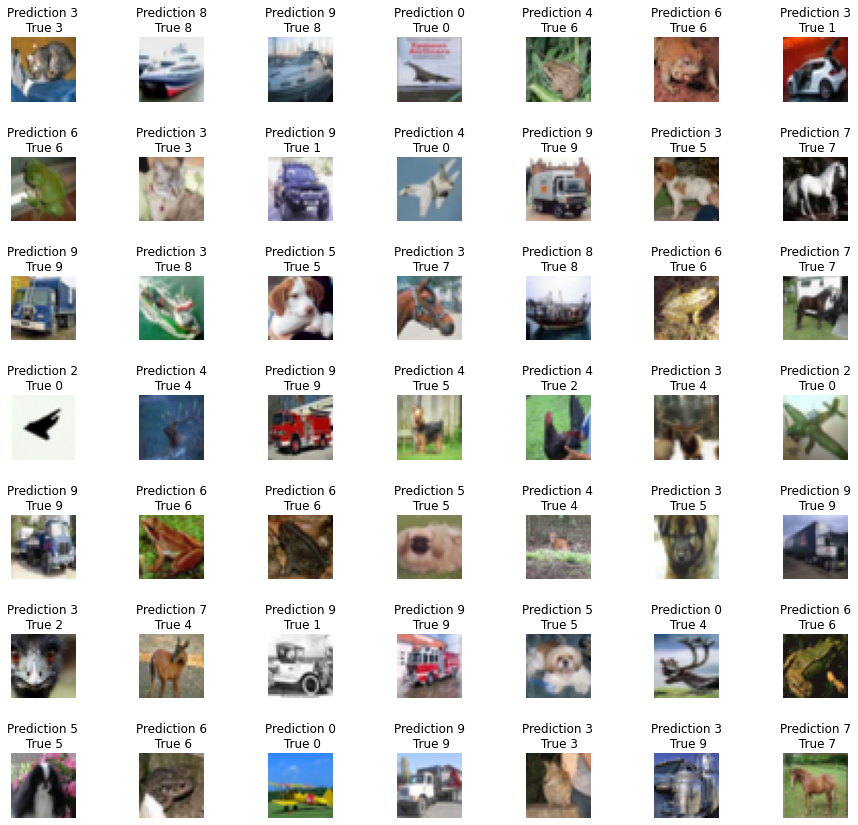

In [31]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize =(15,15))
axes =axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction {}\n True {}'.format(Predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace =1)

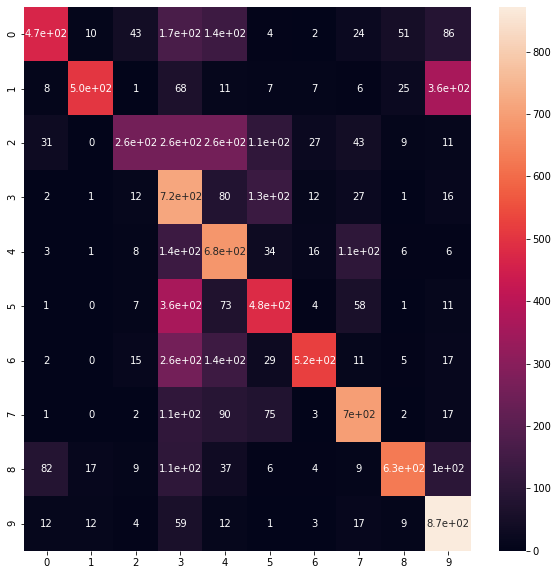

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, Predicted_classes)
cm

plt.figure(figsize =(10,10))
sns.heatmap(cm, annot = True)

# Save the model

In [33]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
  model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
  cnn_model.save(model_path)

# Data Augmentation for the cifar10 dataset

In [34]:
import keras
from keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [36]:
X_test.shape

(10000, 32, 32, 3)

In [37]:
n =8
X_train_sample = X_train[:n]

In [38]:
X_train_sample.shape

(8, 32, 32, 3)

In [39]:
# Image_Data augmentry
from keras.preprocessing.image import ImageDataGenerator
dataget_train =  ImageDataGenerator(rotation_range =90)
dataget_train.fit(X_train_sample)

In [40]:
#! pip install scipy==1.1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


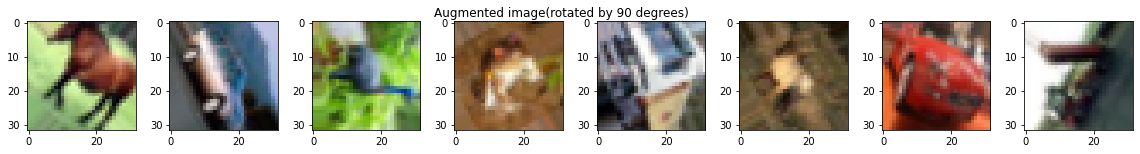

In [41]:
from scipy.misc import toimage
#from PIL import Image
#import numpy as np

fig = plt.figure(figsize=(20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
  for i in range(0,n):
    ax = fig.add_subplot(1,n, i+1)
    ax.imshow(toimage(x_batch[i]))
  fig.suptitle('Augmented image(rotated by 90 degrees)')
  plt.show()
  break;

In [42]:
# model training using augmented data
datagen = ImageDataGenerator(
                            rotation_range =90,
                             width_shift_range =1.5,
                             horizontal_flip =True,
                             vertical_flip = True
)

In [43]:
datagen.fit(X_train)

In [44]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size =32), epochs = 2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
1563/1563 [==============================] - 216s 138ms/step - loss: 572611362094579712.0000 - accuracy: 0.0020
Epoch 2/2
1563/1563 [==============================] - 217s 139ms/step - loss: nan - accuracy: 0.4859


In [46]:
# score = cnn_model.evaluate(X_test, y_test)
#print('Test Accuracy', score[1])

In [47]:
#save the model
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
  model_path = os.path.join(directory, 'keras_cifar10_trained_model_augmented.h5')
  cnn_model.save(model_path)
